# Include \& Exclude substructures in *Limeade*

Substructure inclusion \& exclusion are two major functionalities in *Limeade*, enabling users to manipulate the generated molecules by giving specific requirements in SMARTS form. Generally, the users only need to give a list of SMARTS strings to the following two functions:
- `Mol.include_substructures`: include given substructures.
- `Mol.exclude_substructures`: include given substructures.

`Limeade` will extract several patterns from a given SMARTS and then encode them into constraints. Supported patterns include:
- Given type of atom (e.g., `C`), multiple choices of atom (e.g., `[C, N, O]`), or any atom (`*`).
- Given type of bond (`-`, `=`, `#`), or any bond (`~`).
- Given number of implicit hydrogen atoms (e.g., `[CH2]`, `[NH1]`).
- Given number of neighbors (excluding hydrogen), which equals to degree minus number of hydrogen (e.g., `[CH0X4]`).

*Note:* The type of atom should be chosen from the initial given set of types. Similarly, any atom means any type from the given set.

This notebooks list some examples to show how to use *Limeade* to achieve practical requirements. Since it is easier to show the performance of inclusion, while quite hard to visualize exclusion. In this notebook, when we want to exclude a pattern, we first include a similar but slightly general pattern. Meanwhile, this notebook is only used to show both functionalities instead of generating reasonable molecules, the constraints shown later have no practical meanings. 

The required Python libraries used in this notebook are as follows:
- `Limeade`: the package this notebook demonstrates. It can encode molecule space with given requirements into mathematical equations and generate feasible solutions quickly.
- `rdkit`: used to plot generated molecules.

*Gurobi* is used to generate solutions. Please follow the instructions to obtain a [free academic license](https://www.gurobi.com/academia/academic-program-and-licenses/). 

In [16]:
from limeade import MIPMol
from rdkit import Chem

## Patterns on atom

### Example 1
One can specify the choices for each atom by giving a list of SMARTS strings. For example, we want a single bond between an oxygen atom and a nitrogen or sulfur atom.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

100 molecules are generated after 0.11 seconds.
There are 93 molecules left after removing symmetric and invalid molecules.


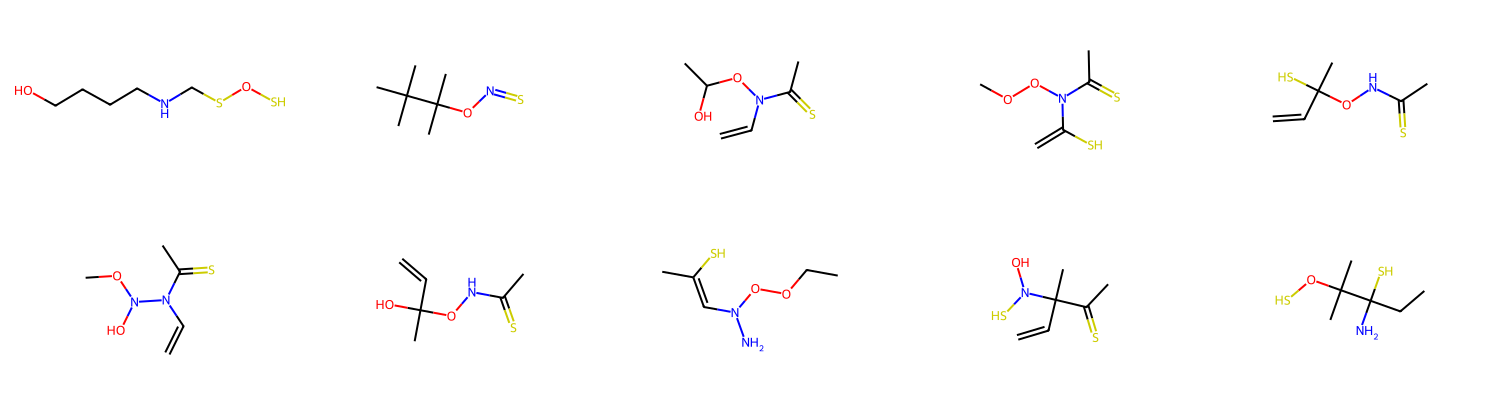

In [17]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern O-[S,N]
Mol.include_substructures(["O-[S,N]"])

# generate 100 molecules and plot the first 10 molecules
mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols[:10]], subImgSize=(300, 200), molsPerRow=5)

Each generated molecule has either `O-N` or `O-S`.

### Example2
One can also just use `*` to denote arbitrary atom (from the given types of atom) and focus on the bonds. For example, we want to include a double bond.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


100 molecules are generated after 0.09 seconds.
There are 96 molecules left after removing symmetric and invalid molecules.


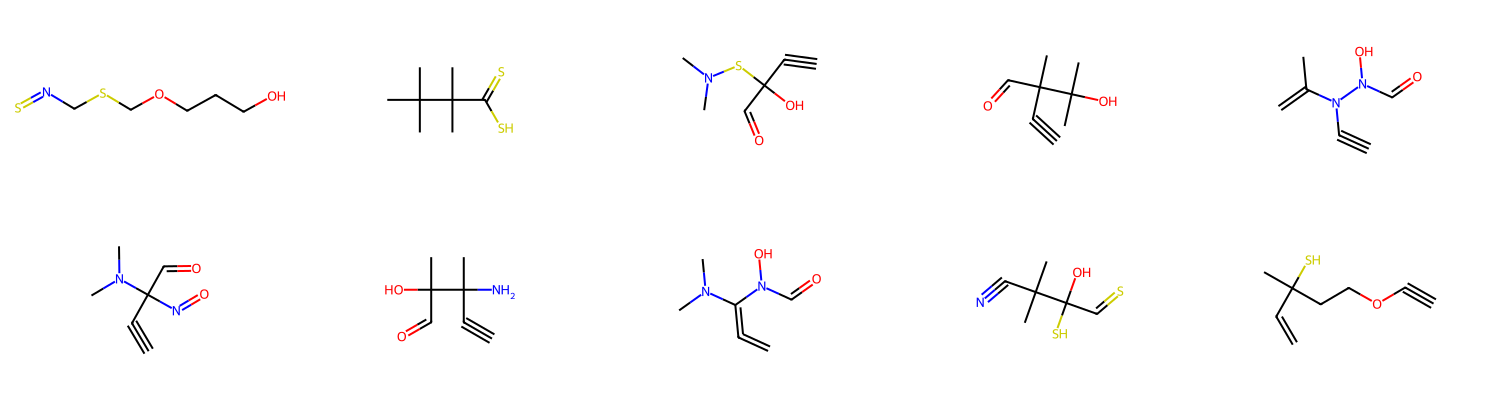

In [18]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern *=*
Mol.include_substructures(["*=*"])

# generate 100 molecules and plot the first 10 molecules
mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols[:10]], subImgSize=(300, 200), molsPerRow=5)

Each generated molecule has a double bond between two arbitrary atoms.

## Patterns on bond

### Example 3
One can use `~` to denote arbitrary bonds between two atoms.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00,  9.43it/s]


100 molecules are generated after 0.11 seconds.
There are 91 molecules left after removing symmetric and invalid molecules.


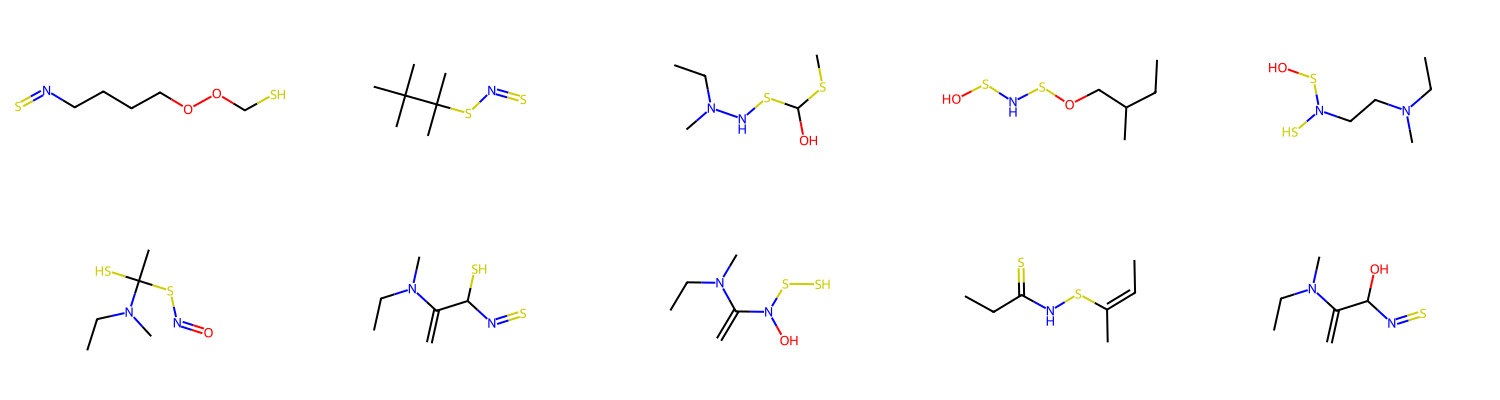

In [19]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern S~N
Mol.include_substructures(["S~N"])

# generate 100 molecules and plot the first 10 molecules
mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols[:10]], subImgSize=(300, 200), molsPerRow=5)

Each generated molecule has either `S-N` or `S=N`.

## Patterns on graph

### Example 4

When there is a double bonds between two carbon atoms, assume that we want both carbon atoms also linked with other atoms, that is, we do not want one of these two carbon atoms be an endpoint. To achieve this requirement, we can exclude a SMART pattern `C=[CH2]`. To make sure this command work, we also include pattern `C=C` so that each generated molecule will have at least a double bond between two carbon atoms.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 11.49it/s]


100 molecules are generated after 0.09 seconds.
There are 91 molecules left after removing symmetric and invalid molecules.


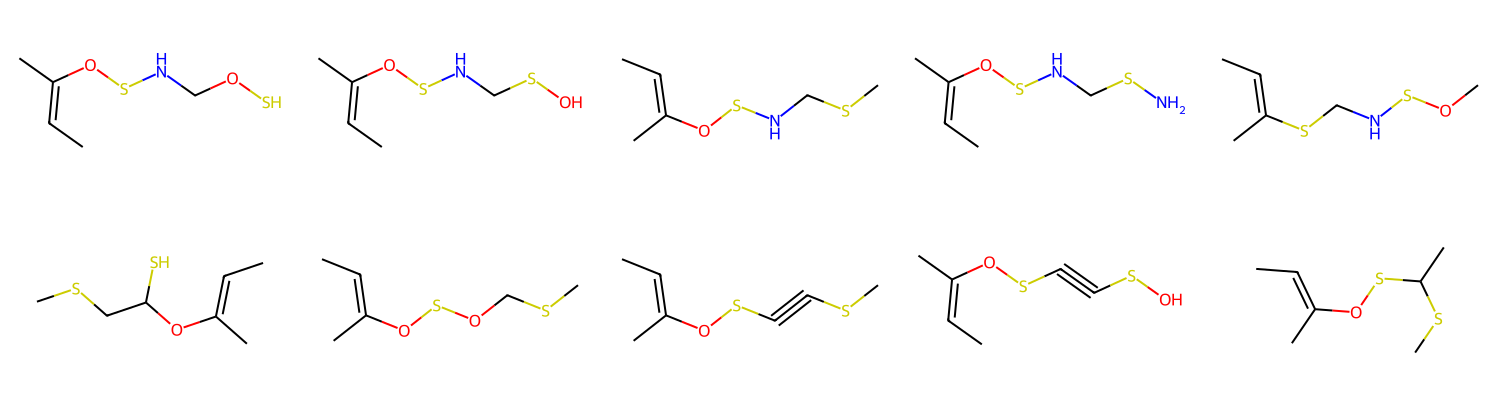

In [20]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern C=C
Mol.include_substructures(["C=C"])
# exclude pattern C=[CH2]
Mol.exclude_substructures(["C=[CH2]"])

# generate 100 molecules and plot the first 10 molecules
mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols[:10]], subImgSize=(300, 200), molsPerRow=5)

Each generated molecule has `C=C` but none of them contains a carbon as endpoint.

### Example 5
Sometimes one might need to fix specific attachment point(s) in a ring. For example, we only want one attachment point given a benzene ring, then we can fix the number of hydrogen atoms as 1 for 5 carbon atoms and leave one as the attachment point.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 20.40it/s]

100 molecules are generated after 0.05 seconds.
There are 79 molecules left after removing symmetric and invalid molecules.


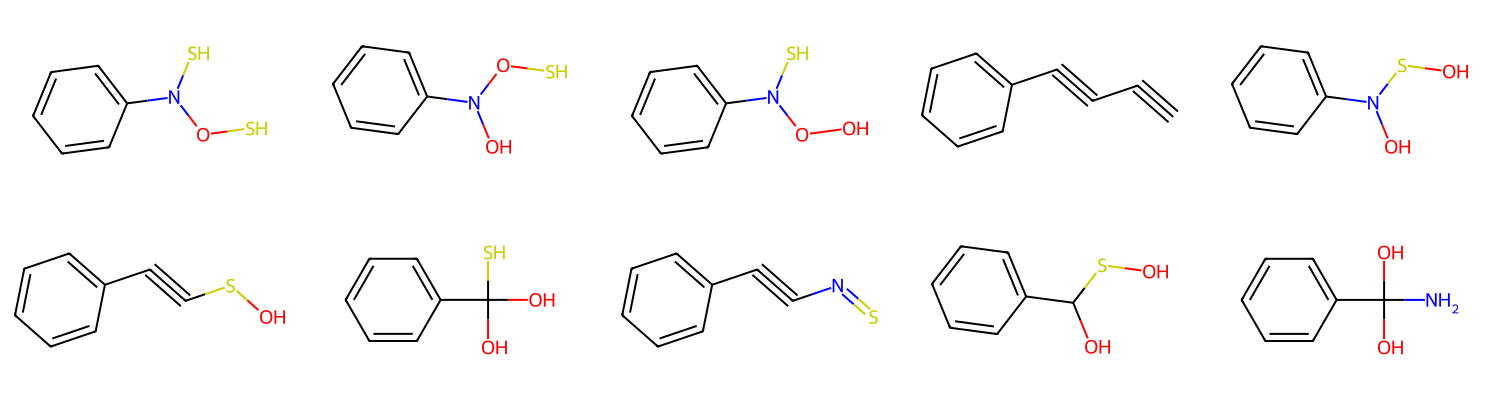

In [21]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 1)

# include pattern [CH]1=[CH][CH]=[CH][CH]=C1
Mol.include_substructures(["[CH]1=[CH][CH]=[CH][CH]=C1"])

# generate 100 molecules and plot the first 10 molecules
mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols[:10]], subImgSize=(300, 200), molsPerRow=5)

Each generated molecule has a benzene ring with only one attachment point.

### Example 6
When one wants to fix the number of neighbors, this can be done by fixing the number of implicit hydrogen atoms and degree. For example, if we want a carbon linked with four neighbors, then its degree is 4 and it has no implicit hydrogen atoms, which corresponds to SMARTS `[CH0X4]`.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

100 molecules are generated after 0.07 seconds.
There are 83 molecules left after removing symmetric and invalid molecules.


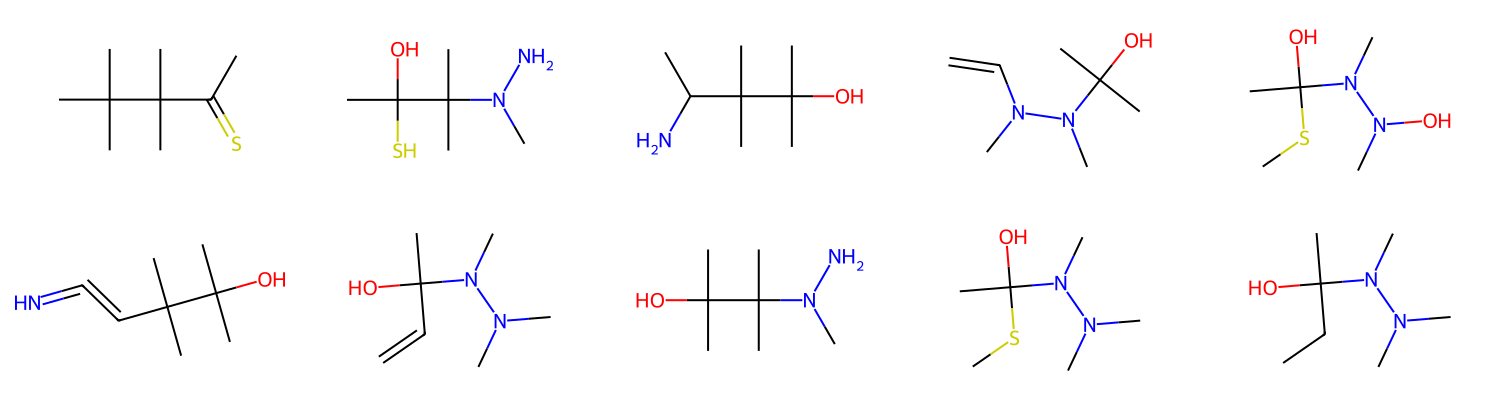

In [22]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern [CH0X4]
Mol.include_substructures(["[CH0X4]"])

# generate 100 molecules and plot the first 10 molecules
mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols[:10]], subImgSize=(300, 200), molsPerRow=5)

Each generated molecule has a carbon atom linked with four neighbors.